# Aim : Denoising of images using Autoencoder

In [1]:
from keras import layers
from keras.datasets import mnist
import keras 
import numpy as np
import matplotlib.pyplot as plt # to display images

In [2]:
(xtrain,_),(xtest,_) = mnist.load_data() # unsupervised

In [3]:
# Preprocessing

xtrain = xtrain.astype('float32')/255

xtrain.shape

(60000, 28, 28)

In [4]:
xtest = xtest.astype('float32')/255

xtest.shape

(10000, 28, 28)

In [5]:
xtrain = np.reshape(xtrain,(len(xtrain),28,28,1))
xtrain.shape

(60000, 28, 28, 1)

In [6]:
xtest = np.reshape(xtest,(len(xtest),28,28,1))
xtest.shape

(10000, 28, 28, 1)

In [7]:
# Generating noisy images

noise_factor = 0.5 # radius of image

xtrain_noisy = xtrain + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size = xtrain.shape)

In [8]:
xtest_noisy = xtest + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size = xtest.shape)

In [9]:
xtrain_noisy = np.clip(xtrain_noisy,0.,1.)

In [10]:
xtest_noisy = np.clip(xtest_noisy,0.,1.)

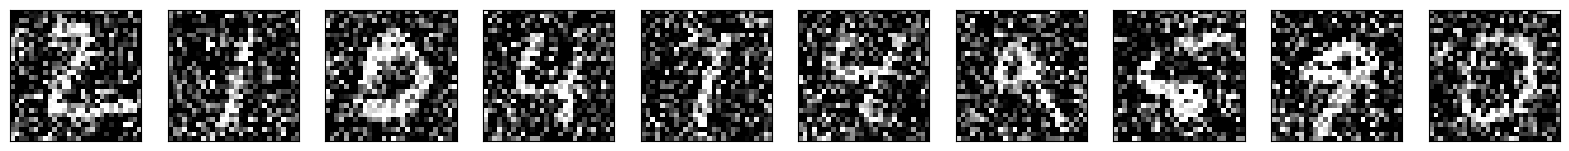

In [11]:
n = 10 
plt.figure(figsize=(20,2))
for i in range(1,n+1):
    ax = plt.subplot(1,n,i)
    plt.imshow(xtest_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [12]:
input_img = keras.Input(shape=(28,28,1)) # input layer

In [13]:
x = layers.Conv2D(32,(3,3), activation = "relu", padding='same')(input_img) # 1 st layer

x =  layers.MaxPooling2D((2,2),padding='same')(x)

x = layers.Conv2D(32,(3,3), activation = "relu", padding='same')(x)

encoded = layers.MaxPooling2D((2,2),padding='same')(x) # compressed images

x = layers.Conv2D(32,(3,3), activation = "relu", padding='same')(encoded)

x =  layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(32,(3,3), activation = "relu", padding='same')(x)

x =  layers.UpSampling2D((2,2))(x)

decoded = layers.Conv2D(1,(3,3), activation = "sigmoid", padding='same')(x)

In [14]:
autoencoder = keras.Model(input_img,decoded)

In [15]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [16]:
autoencoder.fit(xtrain_noisy,xtrain,epochs=3,batch_size=128,validation_data=(xtest_noisy,xtest))

Epoch 1/3
469/469 [==============================] - 41s 86ms/step - loss: 0.1640 - val_loss: 0.1158
Epoch 2/3
469/469 [==============================] - 41s 87ms/step - loss: 0.1126 - val_loss: 0.1080
Epoch 3/3
469/469 [==============================] - 41s 88ms/step - loss: 0.1077 - val_loss: 0.1055


In [17]:
predictions = autoencoder.predict(xtest_noisy)

313/313 [==============================] - 2s 5ms/step


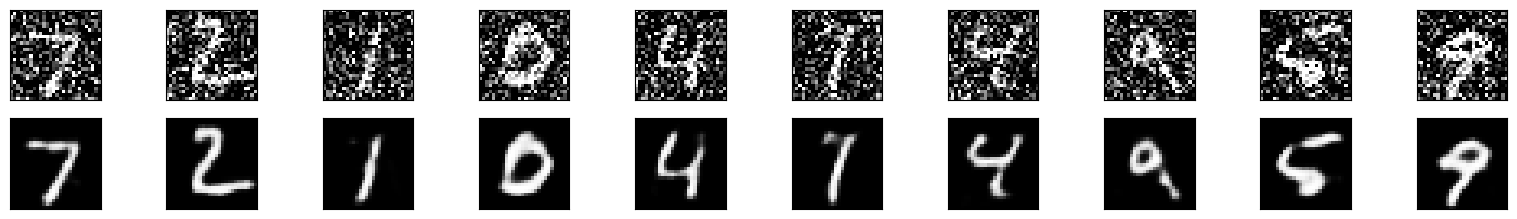

In [20]:
n=10
plt.figure(figsize=(40,4))
for i in range(10):
    ax=plt.subplot(3,20,i+1)
    plt.imshow(xtest[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(3,20,i+1)
    plt.imshow(xtest_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,i+1+20)
    plt.imshow(predictions[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)   

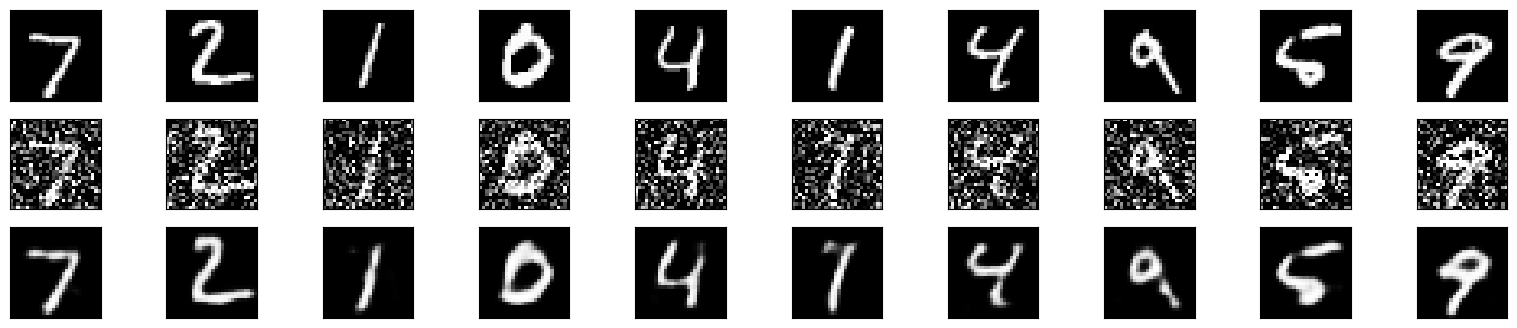

In [22]:
n=10
plt.figure(figsize=(40,4))
for i in range(10):
    ax=plt.subplot(3,20,i+1)
    plt.imshow(xtest[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,i+1+20)
    plt.imshow(xtest_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,2*20+i+1)
    plt.imshow(predictions[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)